In [14]:
from mtbs_utils import initialize_gee
from source_coop_utlis import initialize_dask_cluster,get_usgs_data,get_mtbs_shp
import os
import boto3
from dotenv import load_dotenv

In [15]:
initialize_gee()

Google Earth Engine initialized successfully.


In [23]:
# Example usage
client = initialize_dask_cluster()

/opt/anaconda3/envs/envburn/lib/python3.12/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 53620 instead
  warnings.warn(


Dask Dashboard is available at: http://127.0.0.1:53620/status


In [24]:
AWS_ACCESS_KEY_ID = os.getenv("AWS_ACCESS_KEY_ID")
AWS_SECRET_ACCESS_KEY = os.getenv("AWS_SECRET_ACCESS_KEY")

In [25]:
s3_client = boto3.client('s3',
                         aws_access_key_id = AWS_ACCESS_KEY_ID, 
                         aws_secret_access_key = AWS_SECRET_ACCESS_KEY,
                         endpoint_url='https://data.source.coop'
                        )
file_name= "usgs-mtbs"

In [26]:
usgs_ddf = get_usgs_data(file_name, s3_client)

File already exists locally. No download needed.
File already exists locally. No download needed.


In [27]:
file_name="mtbs_perims_DD.shp"
mtbs_shp_ddf=get_mtbs_shp(file_name, s3_client)

File already exists locally. No download needed.
File already exists locally. No download needed.


In [28]:
mtbs_shp_ddf

,Event_ID,irwinID,Incid_Name,Incid_Type,Map_ID,Map_Prog,Asmnt_Type,BurnBndAc,BurnBndLat,BurnBndLon,Ig_Date,Pre_ID,Post_ID,Perim_ID,dNBR_offst,dNBR_stdDv,NoData_T,IncGreen_T,Low_T,Mod_T,High_T,Comment,geometry
npartitions=4,,,,,,,,,,,,,,,,,,,,,,,
0,object,object,object,object,int64,object,object,int64,object,object,datetime64[ms],object,object,object,int64,int64,int64,int64,int64,int64,int64,object,geometry
7731,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15462,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23193,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30923,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [29]:
mtbs_shp_ddf.compute()

,Event_ID,irwinID,Incid_Name,Incid_Type,Map_ID,Map_Prog,Asmnt_Type,BurnBndAc,BurnBndLat,BurnBndLon,Ig_Date,Pre_ID,Post_ID,Perim_ID,dNBR_offst,dNBR_stdDv,NoData_T,IncGreen_T,Low_T,Mod_T,High_T,Comment,geometry
0,AK6448214467319840607,None,GLACIER CREEK,Wildfire,4534,MTBS,Initial (SS),1897,64.482,-144.673,1984-06-07,None,506801519840713,506601519860705,-9999,-9999,9999,9999,550,165,-20,None,"POLYGON ((-144.67866 64.49452, -144.67802 64.4..."
1,SD4308410285019840906,None,SANDOZ,Wildfire,4535,MTBS,Initial,2691,43.084,-102.850,1984-09-06,503303019840622,503303019840926,None,211,-9999,-970,-150,220,700,9999,None,"POLYGON ((-102.84037 43.07562, -102.84089 43.0..."
2,MT4880411345819840819,None,NAPI PEAK,Wildfire,4536,MTBS,Extended,3680,48.804,-113.458,1984-08-19,504102619840614,504102619850719,None,-62,-9999,-970,-150,160,308,515,None,"POLYGON ((-113.4815 48.80303, -113.48122 48.80..."
3,MT4533610695819840826,None,KIRBY,Wildfire,4537,MTBS,Extended,1597,45.336,-106.958,1984-08-26,503602819840814,503602819850817,None,52,-9999,-970,-150,150,309,525,None,"POLYGON ((-106.9327 45.33398, -106.93237 45.33..."
4,MT4561710632319840918,None,LAKE CREEK,Wildfire,4538,MTBS,Initial,3617,45.617,-106.323,1984-09-18,503602819840814,503602819841017,None,-104,-9999,-970,-150,-50,175,9999,None,"POLYGON ((-106.32656 45.63166, -106.32635 45.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30919,FL2587108124920220306,None,OCHOPEE RX UNIT C (DR311),Prescribed Fire,10024901,MTBS,Initial,2500,25.868,-81.257,2022-03-06,B17RMJ20220214_30m,A17RMJ20220321_30m,None,-33,27,-970,-150,0,9999,9999,None,"POLYGON ((-81.23649 25.87059, -81.23661 25.870..."
30920,FL3027208471520220201,None,UNNAMED,Prescribed Fire,10024910,MTBS,Initial,1071,30.266,-84.701,2022-02-01,901903920220112,901803920220222,None,48,38,-970,-150,100,350,9999,None,"POLYGON ((-84.71347 30.28559, -84.70921 30.285..."
30921,FL3043308448820220301,None,UNNAMED,Prescribed Fire,10024914,MTBS,Initial,2106,30.43,-84.491,2022-03-01,901803920220222,901803920220326,None,34,22,-970,-150,80,400,9999,Burn scar to the east is under a different ID.,"POLYGON ((-84.52515 30.41831, -84.52518 30.418..."
30922,AL3111908654520220504,EDF9CE76-7A31-4BA4-BD95-5DB4BA8605BE,CN BLUE SPRINGS EAST 17,Prescribed Fire,10024915,MTBS,Initial,1887,31.124,-86.547,2022-05-04,902003820220409,902003820220511,None,-68,26,-970,-150,-53,485,9999,None,"POLYGON ((-86.55296 31.11455, -86.55429 31.114..."


In [30]:
ddf=usgs_ddf.compute()

In [31]:
ddf

,Event_ID,irwinID,Incid_Name,Incid_Type,Map_ID,Map_Prog,Asmnt_Type,BurnBndAc,BurnBndLat,BurnBndLon,Ig_Date,Pre_ID,Post_ID,Perim_ID,dNBR_offst,dNBR_stdDv,NoData_T,IncGreen_T,Low_T,Mod_T,High_T,Comment,geometry
0,AK6448214467319840607,None,GLACIER CREEK,Wildfire,4534,MTBS,Initial (SS),1897,64.482,-144.673,1984-06-07,None,506801519840713,506601519860705,-9999,-9999,9999,9999,550,165,-20,None,"POLYGON ((-144.67866 64.49452, -144.67985 64.4..."
1,SD4308410285019840906,None,SANDOZ,Wildfire,4535,MTBS,Initial,2691,43.084,-102.850,1984-09-06,503303019840622,503303019840926,None,211,-9999,-970,-150,220,700,9999,None,"POLYGON ((-102.84037 43.07562, -102.83994 43.0..."
2,MT4880411345819840819,None,NAPI PEAK,Wildfire,4536,MTBS,Extended,3680,48.804,-113.458,1984-08-19,504102619840614,504102619850719,None,-62,-9999,-970,-150,160,308,515,None,"POLYGON ((-113.4815 48.80303, -113.48179 48.80..."
3,MT4533610695819840826,None,KIRBY,Wildfire,4537,MTBS,Extended,1597,45.336,-106.958,1984-08-26,503602819840814,503602819850817,None,52,-9999,-970,-150,150,309,525,None,"POLYGON ((-106.9327 45.33398, -106.93328 45.33..."
4,MT4561710632319840918,None,LAKE CREEK,Wildfire,4538,MTBS,Initial,3617,45.617,-106.323,1984-09-18,503602819840814,503602819841017,None,-104,-9999,-970,-150,-50,175,9999,None,"POLYGON ((-106.32656 45.63166, -106.32693 45.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30919,FL2587108124920220306,None,OCHOPEE RX UNIT C (DR311),Prescribed Fire,10024901,MTBS,Initial,2500,25.868,-81.257,2022-03-06,B17RMJ20220214_30m,A17RMJ20220321_30m,None,-33,27,-970,-150,0,9999,9999,None,"POLYGON ((-81.23649 25.87059, -81.23461 25.871..."
30920,FL3027208471520220201,None,UNNAMED,Prescribed Fire,10024910,MTBS,Initial,1071,30.266,-84.701,2022-02-01,901903920220112,901803920220222,None,48,38,-970,-150,100,350,9999,None,"POLYGON ((-84.71347 30.28559, -84.71359 30.284..."
30921,FL3043308448820220301,None,UNNAMED,Prescribed Fire,10024914,MTBS,Initial,2106,30.43,-84.491,2022-03-01,901803920220222,901803920220326,None,34,22,-970,-150,80,400,9999,Burn scar to the east is under a different ID.,"POLYGON ((-84.52515 30.41831, -84.52513 30.418..."
30922,AL3111908654520220504,EDF9CE76-7A31-4BA4-BD95-5DB4BA8605BE,CN BLUE SPRINGS EAST 17,Prescribed Fire,10024915,MTBS,Initial,1887,31.124,-86.547,2022-05-04,902003820220409,902003820220511,None,-68,26,-970,-150,-53,485,9999,None,"POLYGON ((-86.55296 31.11455, -86.55267 31.114..."


<Axes: >

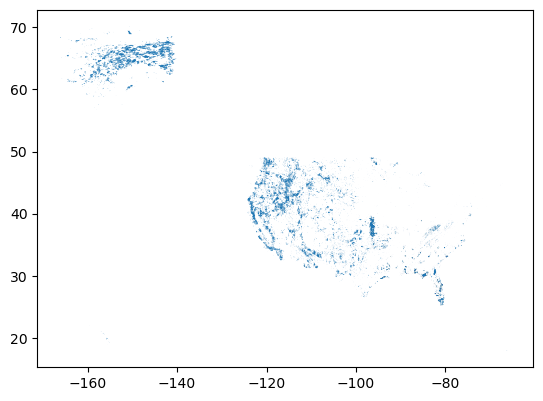

In [32]:
ddf.plot()